In [1]:
import pandas
df = pandas.read_csv('dataset.csv')
df.fillna(0, inplace=True)


In [2]:
import numpy
from numpy import zeros
y = zeros((len(df),), dtype=numpy.int)

for i in range(0, len(df)):

    #Car        1
    #Still      2
    #Train      3
    #Walking    4
    #Bus        5

    if df.iloc[i]['target']=='Car':
        y[i] = 1
    if df.iloc[i]['target'] == 'Still':
        y[i] = 2
    if df.iloc[i]['target'] == 'Train':
        y[i] = 3
    if df.iloc[i]['target'] == 'Walking':
        y[i] = 4
    if df.iloc[i]['target'] == 'Bus':
        y[i] = 5

print(y)

[2 1 2 ... 2 2 4]


In [3]:
X = df.loc[:, ['android.sensor.accelerometer#mean',
                 'android.sensor.magnetic_field#mean',
                 'android.sensor.gyroscope#mean',
                 'android.sensor.pressure#mean'
                ]].values
print(X)

[[9.81147629e+00 5.70996379e+01 1.65077522e-03 1.00409026e+03]
 [9.93920678e+00 2.93512875e+01 3.63257142e-02 1.00827466e+03]
 [9.82717784e+00 2.99049270e+01 1.52461653e-03 1.00597754e+03]
 ...
 [9.81289280e+00 5.70260013e+01 1.80334690e-03 1.00412324e+03]
 [9.83114379e+00 6.22770084e+01 3.65158474e-03 0.00000000e+00]
 [1.10510094e+01 4.39834194e+01 1.45440841e+00 0.00000000e+00]]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [5]:
from sklearn import ensemble

model = ensemble.RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
from sklearn.metrics import accuracy_score

predicted_train = model.predict(X_train)
predicted_test  = model.predict(X_test)

print('Train accuracy')
print(accuracy_score(y_train, predicted_train))

print('Test score')
accuracy = accuracy_score(y_test, predicted_test)
print(accuracy)

Train accuracy
0.9983029274501485
Test score
0.8295165394402035


In [7]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predicted_test))
print(classification_report(y_test, predicted_test))

[[174  17  17   3  23]
 [ 14 209   4   6  12]
 [ 21  10 210   0  13]
 [  6   3   0 204   2]
 [ 22  14   8   6 181]]
              precision    recall  f1-score   support

           1       0.73      0.74      0.74       234
           2       0.83      0.85      0.84       245
           3       0.88      0.83      0.85       254
           4       0.93      0.95      0.94       215
           5       0.78      0.78      0.78       231

   micro avg       0.83      0.83      0.83      1179
   macro avg       0.83      0.83      0.83      1179
weighted avg       0.83      0.83      0.83      1179



In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

acc_mean= 'android.sensor.accelerometer#mean'

magn_mean= 'android.sensor.magnetic_field#mean'

gyro_mean= 'android.sensor.gyroscope#mean'


x= acc_mean
y= gyro_mean
z= magn_mean

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.figure(figsize=(200, 200))

color = ['','red', 'cyan','yellow','green', 'blue']
transport_mode = ['','Car', 'Still', 'Train','Walking','Bus']

for i in range(1, 6):
    target_df = df[df['target'] == transport_mode[i]]
    ax.scatter( target_df[x], target_df[y], target_df[z], color=color[i], s=2, alpha=0.7, label=transport_mode[i])


ax.set_xlabel('Accelerometer')
ax.set_ylabel('Gyroscope')
ax.set_zlabel('Magnetic_field')

plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 20000x20000 with 0 Axes>

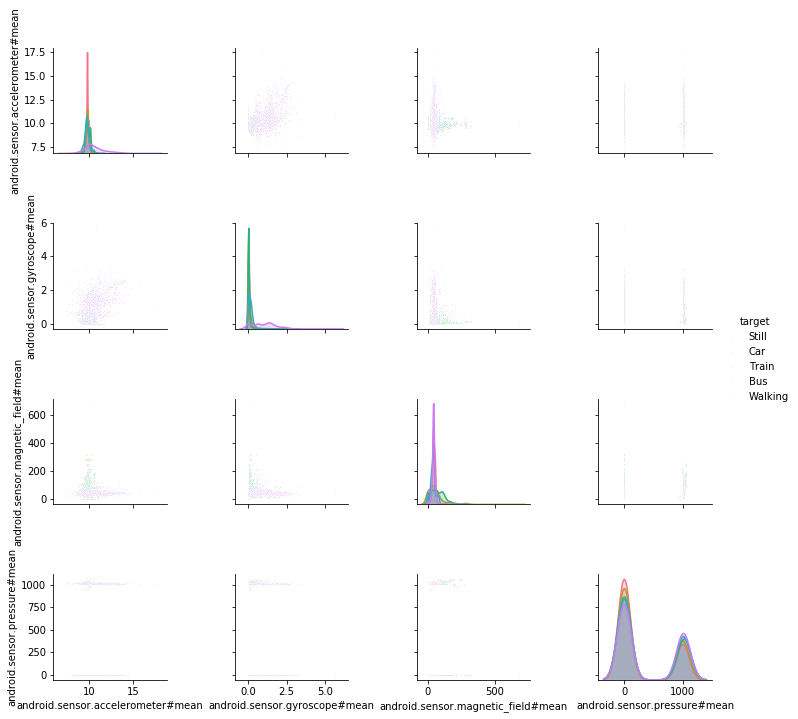

In [12]:
import seaborn as sns

df_pp=df.loc[:, ['android.sensor.accelerometer#mean',
'android.sensor.gyroscope#mean',
'android.sensor.magnetic_field#mean',
'android.sensor.pressure#mean',
'target'
]]

sns.pairplot(df_pp, hue="target", palette="husl", plot_kws={"alpha": 0.5, "s": 1} )

plt.show()